In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


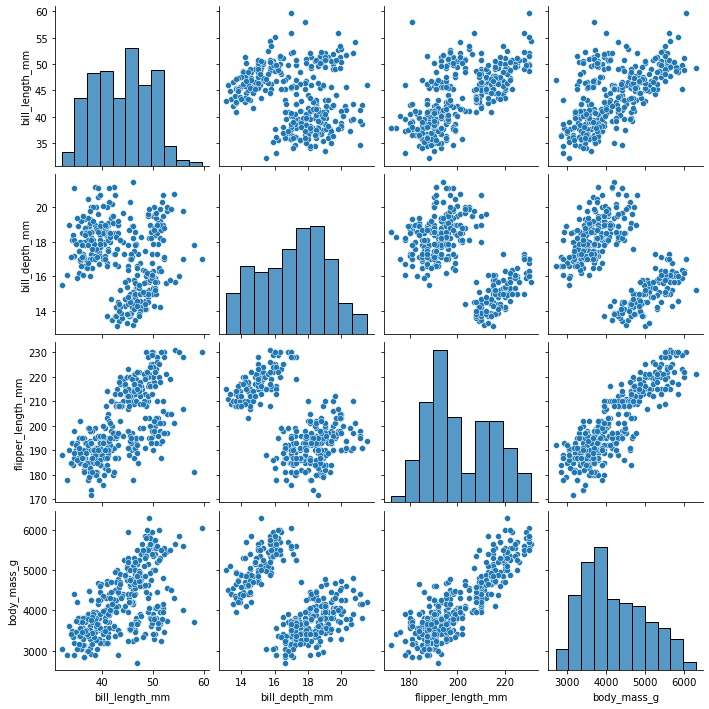

In [3]:
sns.pairplot(penguins)

Ik zie 3 clusters ontstaan

In [4]:
penguins = penguins.dropna()

In [25]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=3, random_state=42).fit(penguins[features])

In [26]:
penguins['cluster'] = km.predict(penguins[features])

C:\Users\stanv\AppData\Local\Temp/ipykernel_12424/1567450945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['cluster'] = km.predict(penguins[features])


In [27]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


In [28]:
penguins.cluster.value_counts()

1    161
0    102
2     70
Name: cluster, dtype: int64

In [29]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.57518504839574

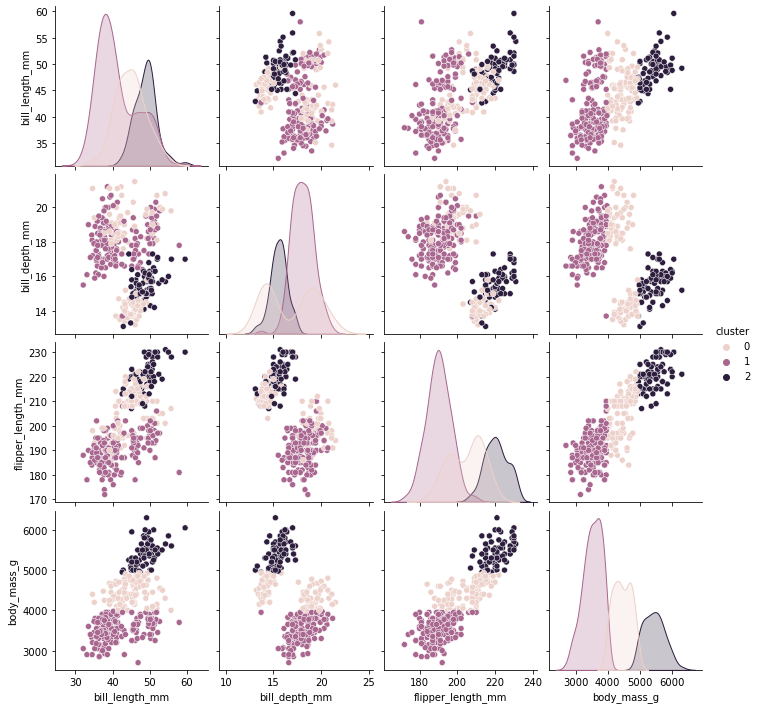

In [30]:
sns.pairplot(penguins, hue="cluster")

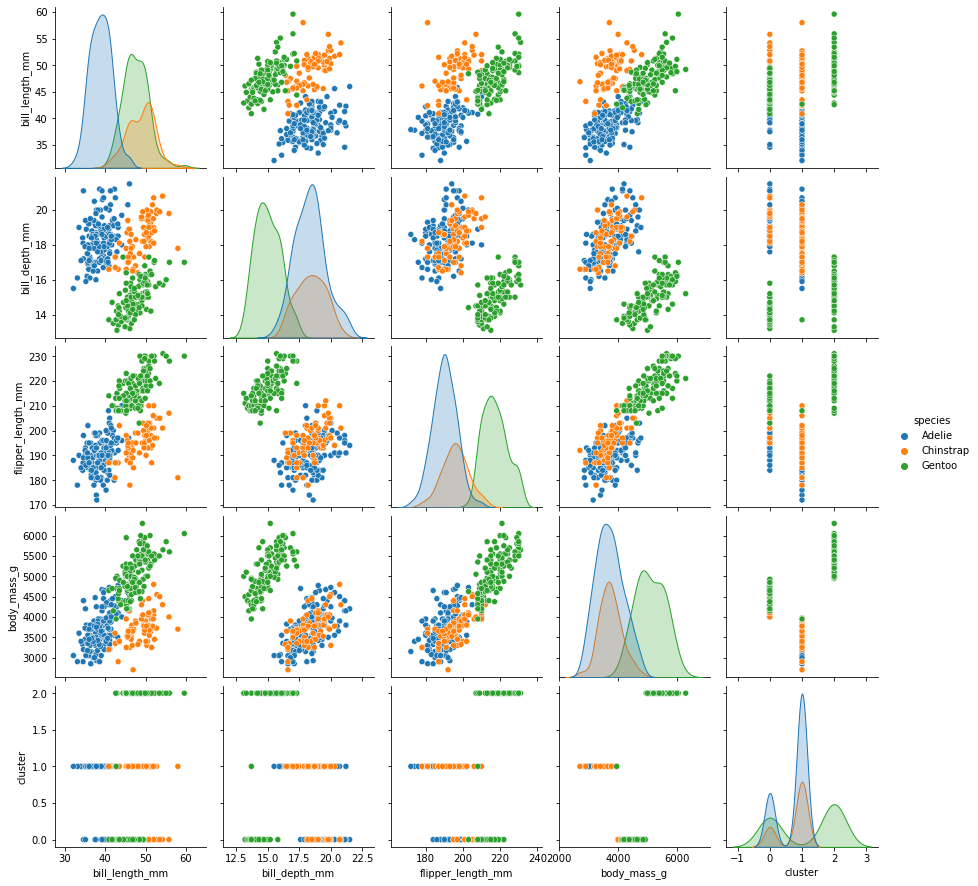

In [31]:
sns.pairplot(penguins, hue="species")

In [32]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1,2
species,,,
Adelie,38,108,0
Chinstrap,16,52,0
Gentoo,48,1,70


Elke species is in 1 cluser bijna niet aanwezig. Dit zegt dat eigenlijk dat er altijd 2 species wel overeenkomen bij de data.